In [30]:
import pandas as pd


In [31]:
train=pd.read_csv("twitter_training.csv")
test=pd.read_csv("twitter_validation.csv")

In [32]:
test.columns = ['Header1', 'company','labels','text']
train.columns = ['Header1', 'company','labels','text']

In [33]:
print(train)
print("---------------------------------------------------------------------")
print(test)

       Header1      company    labels  \
0         2401  Borderlands  Positive   
1         2401  Borderlands  Positive   
2         2401  Borderlands  Positive   
3         2401  Borderlands  Positive   
4         2401  Borderlands  Positive   
...        ...          ...       ...   
74676     9200       Nvidia  Positive   
74677     9200       Nvidia  Positive   
74678     9200       Nvidia  Positive   
74679     9200       Nvidia  Positive   
74680     9200       Nvidia  Positive   

                                                    text  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac wi

In [34]:
train.drop(columns=["Header1","company"],inplace=True)
test.drop(columns=["Header1","company"],inplace=True)

In [35]:
train.head() 

,labels,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [36]:
test.head()

,labels,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [37]:
sentiment=pd.concat([train,test],ignore_index=True)
sentiment

,labels,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
75675,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75676,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75677,Positive,Today sucked so it’s time to drink wine n play...
75678,Positive,Bought a fraction of Microsoft today. Small wins.


In [38]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75680 entries, 0 to 75679
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  75680 non-null  object
 1   text    74994 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [39]:
sentiment.isnull().sum()

labels      0
text      686
dtype: int64

In [40]:
sentiment.dropna(inplace=True)
sentiment.isnull().sum()

labels    0
text      0
dtype: int64

In [41]:
sentiment.duplicated().sum()

4743

In [42]:
sentiment.drop_duplicates(inplace=True)
sentiment.duplicated().sum()

0

In [43]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

In [44]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text
    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical
    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

In [45]:
x=sentiment.drop('labels',axis=1)
y=sentiment.labels

In [46]:
texts=list(x['text'])

In [47]:
cleaned_text = [process_text(text) for text in texts]

KeyboardInterrupt: 

In [ ]:
print(cleaned_text[:10])

[['coming', 'border', 'kill'], ['getting', 'borderland', 'kill'], ['coming', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'twitter', 'mlsiwfjg'], ['spent', 'couple', 'hour', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'picture', 'compared', 'creation', 'made', 'twitter', 'mlsiwfjg'], ['spent', 'hour', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'rhandlerr', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'twitter', 'mlsiwfjg'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'rhandlerr', 'maya

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab = 20000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

the size of vocab = 24048


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)

In [ ]:
y.value_counts()

labels
Negative      21329
Positive      19270
Neutral       17281
Irrelevant    12371
Name: count, dtype: int64

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,GlobalMaxPooling1D,Dropout,Bidirectional
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
D=100
inputt=Input(shape=(maxlen,))

In [ ]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001  # Set your desired learning rate here
x=Embedding(v+1,D)(inputt)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(150))(x)
x = Dense(32, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [48]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)
history = model.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_test, y_test_one_hot))

Epoch 1/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 195s 111ms/step - accuracy: 0.6638 - loss: 0.8348 - val_accuracy: 0.7052 - val_loss: 0.7714
Epoch 2/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 202s 115ms/step - accuracy: 0.7408 - loss: 0.6788 - val_accuracy: 0.7584 - val_loss: 0.6419
Epoch 3/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 225s 128ms/step - accuracy: 0.7920 - loss: 0.5532 - val_accuracy: 0.7994 - val_loss: 0.5497
Epoch 4/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1625s 925ms/step - accuracy: 0.8250 - loss: 0.4698 - val_accuracy: 0.8099 - val_loss: 0.5070
Epoch 5/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 212s 120ms/step - accuracy: 0.8478 - loss: 0.4100 - val_accuracy: 0.8284 - val_loss: 0.4625
Epoch 6/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 213s 121ms/step - accuracy: 0.8619 - loss: 0.3692 - val_accuracy: 0.8395 - val_loss: 0.4368
Epoch 7/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 282s 161ms/step - accuracy: 0.8738 - loss: 0.3372 - val_accuracy: 0.8450 - val_loss: 0.4215
Epoch 8/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 209s 119ms/step - a

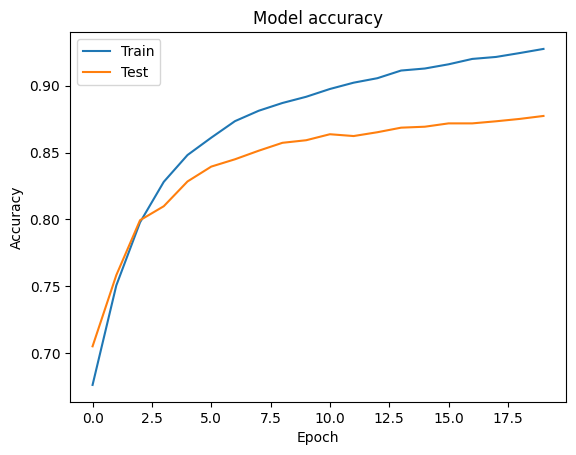

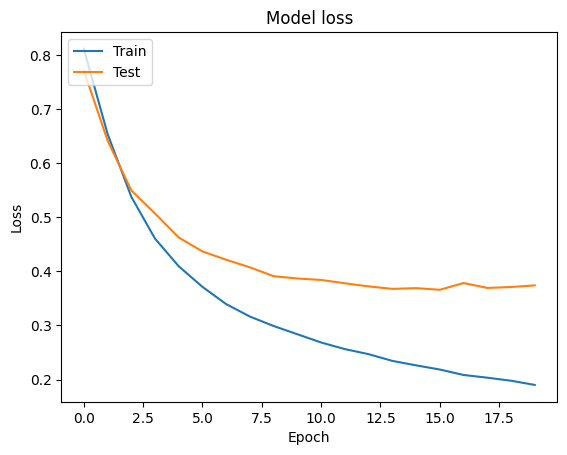

In [49]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [50]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

440/440 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8796 - loss: 0.3677
Test Loss: 0.3740347921848297
Test Accuracy: 0.8773753046989441


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [52]:
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

440/440 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step


<Axes: >

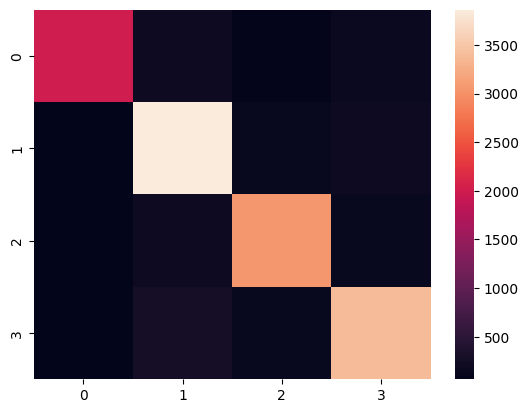

In [53]:
sns.heatmap(conf_matrix)

In [54]:
import joblib

In [55]:
joblib.dump(model,'model.lb')

['model.lb']